<a href="https://colab.research.google.com/github/swapnasamirshukla/MLD/blob/main/Matplotlib_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

Hint:
<br>import numpy as np</br>
<br>import matplotlib.pyplot as plt</br>
<br>from mpl_toolkits.mplot3d import Axes3D</br>
<br>from sklearn import decomposition</br>
<br>from sklearn import datasets</br>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

In [ ]:
# Load IRIS Dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Convert 4 features to 3 dimensions
pca = PCA(n_components=3)
pca.fit(iris.iloc[:,0:4])
iris_pca=pca.transform(iris.iloc[:,0:4])

In [ ]:
# Store in a single dataframe . Might be useful for any future operations on this data set
iris_transform=pd.concat([pd.DataFrame(iris_pca,columns=['Feature_1','Feature_2','Feature_3']),iris[['species']]],axis=1)

In [ ]:
iris_transform.head()

,Feature_1,Feature_2,Feature_3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa


In [ ]:
''' Not using Label Encoder, Need to Convert the target categorical value to Numerical Value to pass it as an argument 
to ax.scatter . The color 'c' parameter accepts only numerical data '''
def func_encode(row):
    if row=='setosa':
        return 0
    elif row=='versicolor':
        return 1
    elif row=='virginica':
        return 2
    
    
iris_transform['species']=iris_transform['species'].apply(func_encode)

In [ ]:
iris_transform.head() # Check the transformed Y Column(species)

,Feature_1,Feature_2,Feature_3,species
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


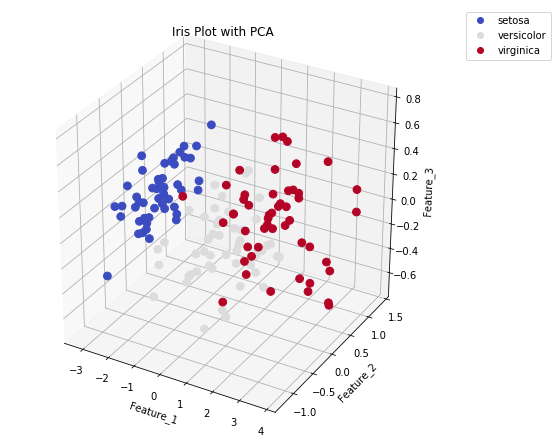

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# plot
sc = ax.scatter(iris_transform['Feature_1'], iris_transform['Feature_2'], iris_transform['Feature_3'], s=60,c=iris_transform['species'],cmap=plt.cm.coolwarm, marker='o', alpha=1)
ax.set_xlabel('Feature_1')
ax.set_ylabel('Feature_2')
ax.set_zlabel('Feature_3')
plt.legend(*tuple([sc.legend_elements()[0],['setosa','versicolor','virginica']]), bbox_to_anchor=(1.05, 1), loc=2)
plt.title("Iris Plot with PCA")
plt.show()